# Bike Sharing with Multiple Linear Regression

### Business Goal:
    We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 
    
So interpretation is important!

#### The Steps we will follow in this assignment as follow:
1. Reading, understanding and visualising the data
2. Preparing the data for modelling(train-test split,rescaling etc)
3. Training the model
4. Residual analysis
5. Predictions and evaluation

## Step 1: Reading, understanding the data
Let us first import Numpy and pandas and read the housing dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data
bikedata  = pd.read_csv("day.csv")
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikedata.shape

(730, 16)

In [4]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Dataframe consists of 730 rows and 16 columns

In [5]:
bikedata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Cleaning
Drop columns that are not useful for data analysis
- `instant`:as it is the record index
- `dteday`: as the features of date are alreeady there like yr as year, mnth as month and weekday
- `casual` and `registered`: as the are in cnt, because cnt is sum of both the values

In [6]:
# Dropping instant column as it is merely a index column which has no significance for our target
bikedata.drop(['instant'],axis=1,inplace=True)

# dteday is not useful as month,year and weekday are covering it
bikedata.drop(['dteday'],axis=1,inplace=True)

#Removing casual and registered as cnt is sum of these
bikedata.drop(['casual','registered'],axis=1,inplace=True)
#bikedata.drop(['registered'],axis=1,inplace=True)

Checking any `null data` in provided dataset

In [7]:
bikedata.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [8]:
bikedata.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

data file does not have any null records.

## Step 2: Visualising the Data for better understand the data and variables

The most important step - understanding the data.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

In [9]:
bikedata.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


#### Visualising data to find correlation from numerical variables
Let's make pair-plot charts among the numerical variables


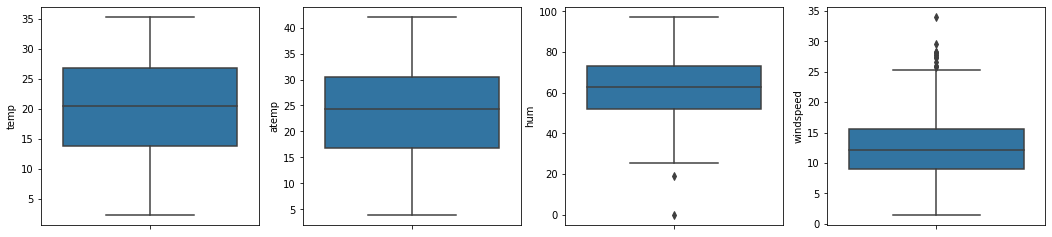

In [10]:
#Visualizing the numerical variables
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikedata)
    i+=1

### Checking `Correlation` with help of pairplots

<Figure size 1080x2160 with 0 Axes>

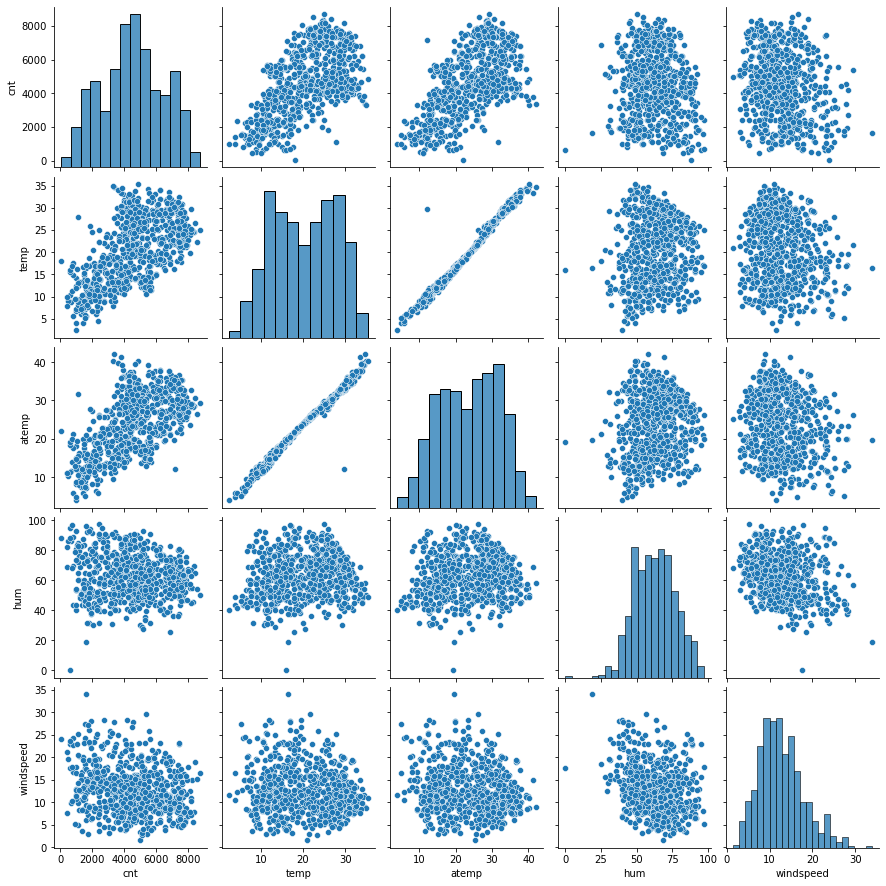

In [11]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bikedata,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

In [12]:
### Checking the `Correlation` for Numerical variables with help of Heatmaps

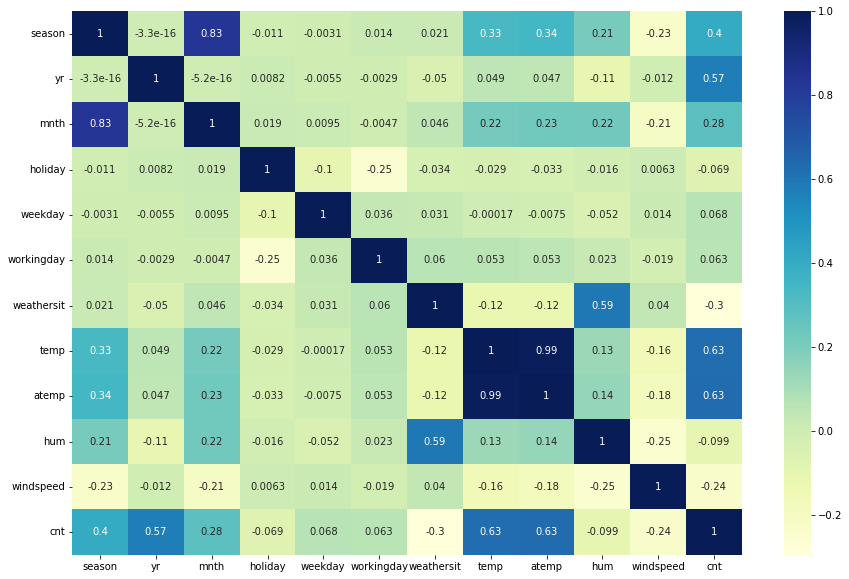

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(bikedata.corr(),cmap="YlGnBu",annot=True)
plt.show()

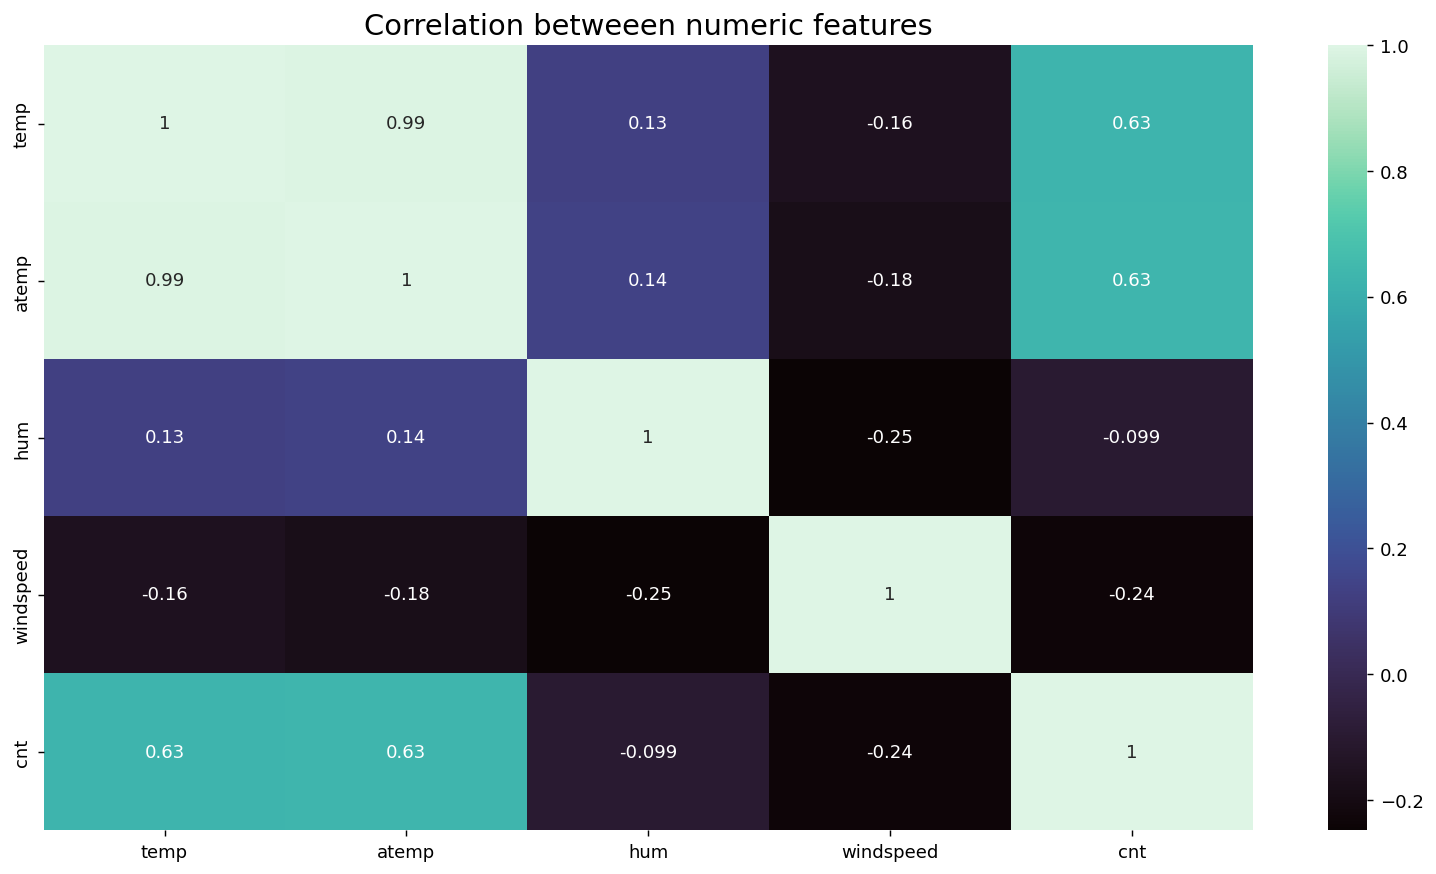

In [14]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation betweeen numeric features",fontsize=16)
sns.heatmap(bikedata[num_features].corr(),annot= True,cmap="mako")
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

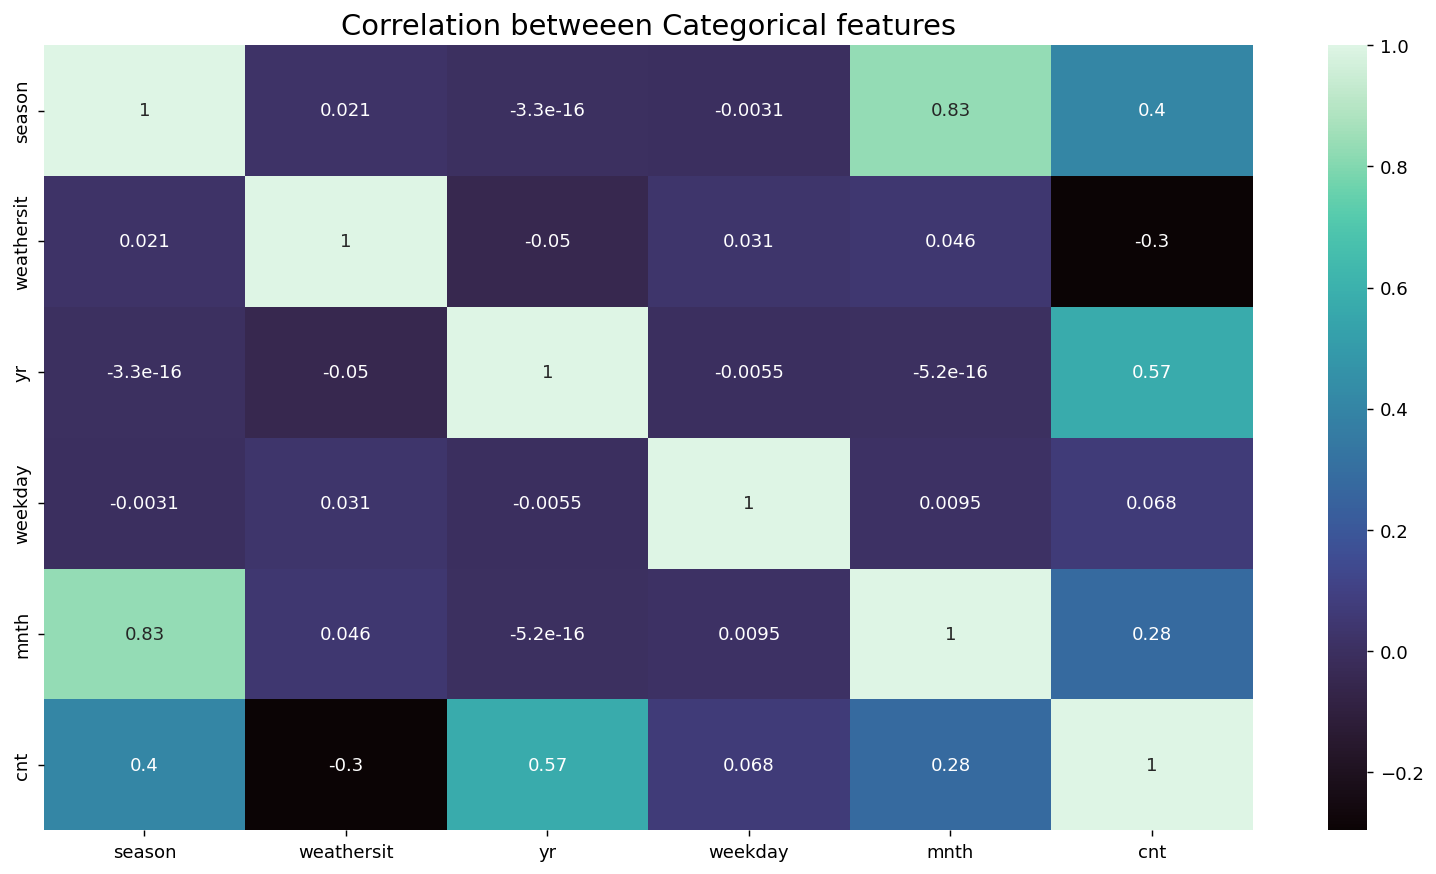

In [15]:
cat_features = ["season","weathersit","yr","weekday","mnth","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation betweeen Categorical features",fontsize=16)
sns.heatmap(bikedata[cat_features].corr(),annot= True,cmap="mako")
plt.show()

In [16]:
bikedata.season.replace({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"},inplace = True)
bikedata.weathersit.replace({1:'Good',2:'Moderate',3:'Bad',4:'Severe'},inplace = True)
bikedata.yr.replace({0:'2018',1:'2019'},inplace = True)
bikedata.weekday.replace({0: 'Tue',1: 'Wed',2: 'Thu',3: 'Fri',4: 'Sat',5: 'Sun',6: 'Mon',},inplace = True)
bikedata.mnth = bikedata.mnth.replace({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',
                  7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,Jan,0,Mon,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,0,Tue,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,0,Wed,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,0,Thu,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,0,Fri,1,Good,9.305237,11.46350,43.6957,12.522300,1600


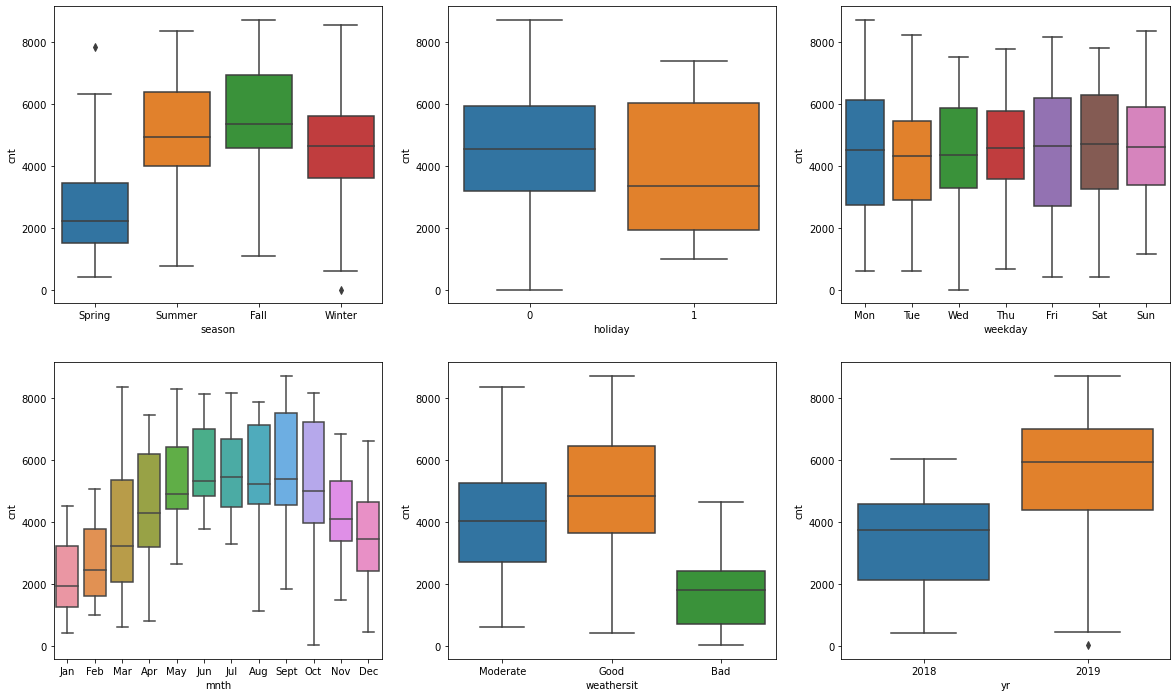

In [17]:
# Visualizing the categorical variables
#control the size of figure
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bikedata)

plt.subplot(2,3,2)
sns.boxplot(x='holiday',y='cnt',data=bikedata)

plt.subplot(2,3,3)
sns.boxplot(x='weekday',y='cnt',data=bikedata)

plt.subplot(2,3,4)
sns.boxplot(x='mnth',y='cnt',data=bikedata)

plt.subplot(2,3,5)
sns.boxplot(x='weathersit',y='cnt',data=bikedata)

plt.subplot(2,3,6)
sns.boxplot(x='yr',y='cnt',data=bikedata)

plt.show()

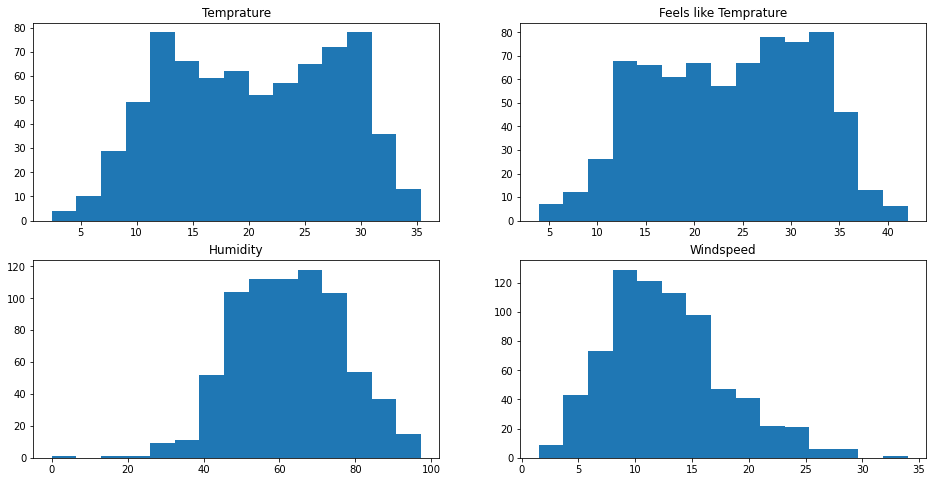

In [18]:
# Histogram Data Visualization
fig, axs = plt.subplots(nrows = 2, ncols =2, figsize = (16,8))
axs[0, 0].hist(bikedata["temp"], bins = 15)
axs[0, 0].set_title("Temprature")
axs[0, 1].hist(bikedata ["atemp"],  bins = 15)
axs[0, 1].set_title("Feels like Temprature")
axs[1, 0].hist(bikedata["hum"],  bins = 15) 
axs[1, 0].set_title("Humidity")
axs[1, 1].hist(bikedata["windspeed"],  bins = 15)
axs[1, 1].set_title("Windspeed");

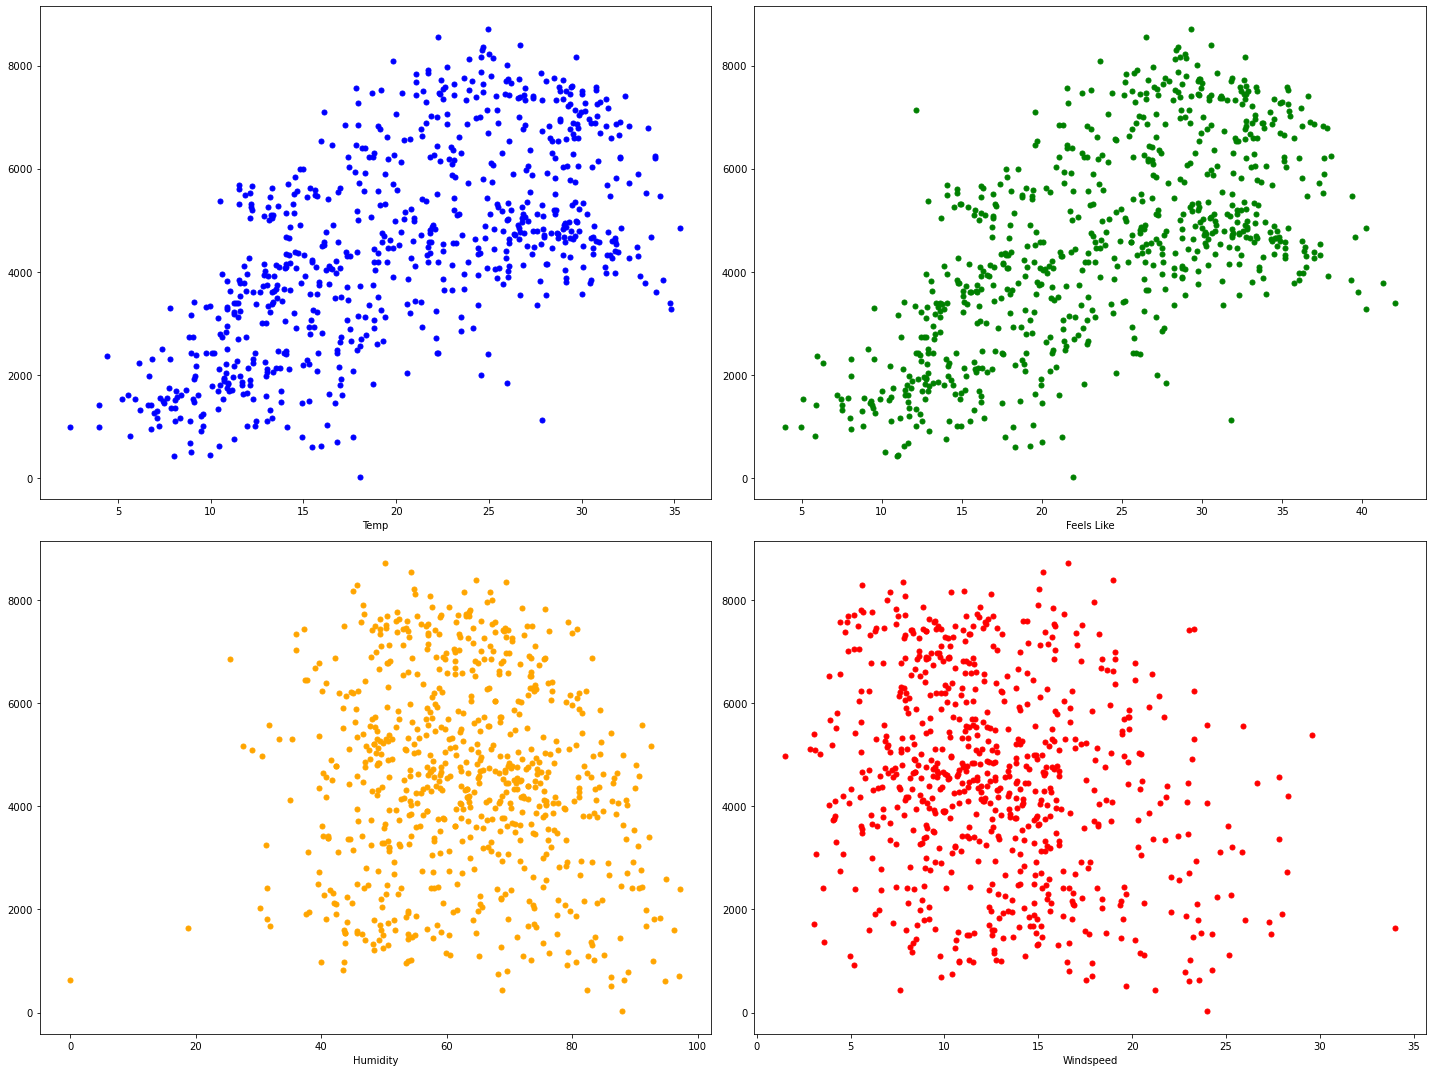

In [19]:
# Scatter visualization
fig = plt.figure(figsize = (20, 15))
fig.add_subplot(221, xlabel ="Temp").scatter(bikedata["temp"], bikedata["cnt"],c="blue", s=25)
fig.add_subplot(222, xlabel ="Feels Like").scatter(bikedata["atemp"], bikedata["cnt"],c="green", s=25)
fig.add_subplot(223, xlabel ="Humidity").scatter(bikedata["hum"], bikedata["cnt"],c="orange", s=25)
fig.add_subplot(224, xlabel ="Windspeed").scatter(bikedata["windspeed"], bikedata["cnt"],c="red", s=25)
plt.tight_layout();

As per above charts observation
- Highest bike demand during Temprature between (10 to 33) degree
- Highest bike demand during Humidity from (40 to 90)%
- Highest bike demand during Windspeed from (0 to 20) knots

In [20]:
bikedata.groupby('weekday').describe()['cnt'].transpose()

weekday,Fri,Mon,Sat,Sun,Thu,Tue,Wed
count,103.000000,105.000000,104.000000,104.000000,104.000000,105.000000,105.000000
mean,4574.893204,4550.542857,4667.259615,4690.288462,4510.663462,4228.828571,4338.123810
std,2030.176095,2196.693009,1939.433317,1874.624870,1826.911642,1872.496629,1793.074013
min,441.000000,627.000000,431.000000,1167.000000,683.000000,605.000000,22.000000
25%,2731.000000,2732.000000,3270.750000,3390.750000,3579.250000,2918.000000,3310.000000
50%,4656.000000,4521.000000,4721.000000,4601.500000,4576.500000,4334.000000,4359.000000
75%,6182.500000,6140.000000,6286.000000,5900.500000,5769.000000,5464.000000,5875.000000
max,8173.000000,8714.000000,7804.000000,8362.000000,7767.000000,8227.000000,7525.000000


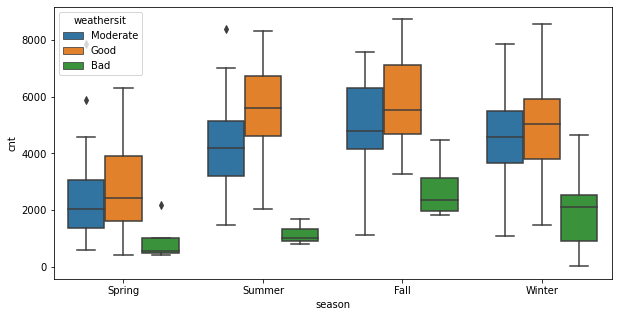

In [21]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = bikedata)
plt.show()

## Step 2: Preparing the Data for Modeling
Encoding:
- Checking unique values from each variables
- creating categorical variables convert to dummy variables
- Splitting data into train and test
- Rescaling of variables

In [22]:
bikedata.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [23]:
bikedata.nunique() #gives info about unique values present in data

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

#### Dropping redudndent variables `holiday` with `workingday` and `temp` with `atemp`; Hence, dropping the `holiday` and `atemp`

In [24]:
#bikedata.drop(['holiday','atemp','yr'],axis=1,inplace=True) #dropping the redundant variables ==> old yarra
bikedata.drop(['holiday','atemp'],axis=1,inplace=True) #dropping the redundant variables 

In [25]:
bikedata.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,2018,Jan,Mon,0,Moderate,14.110847,80.5833,10.749882,985
1,Spring,2018,Jan,Tue,0,Moderate,14.902598,69.6087,16.652113,801
2,Spring,2018,Jan,Wed,1,Good,8.050924,43.7273,16.636703,1349
3,Spring,2018,Jan,Thu,1,Good,8.200000,59.0435,10.739832,1562
4,Spring,2018,Jan,Fri,1,Good,9.305237,43.6957,12.522300,1600


In [26]:
bikedata = bikedata.rename(columns={'mnth': 'month','yr':'year'}) # renaming variable names for better understanding

In [27]:
bikedata.year.replace({'2018':0,'2019':1},inplace = True)
bikedata.head()

,season,year,month,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,Mon,0,Moderate,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,Tue,0,Moderate,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,Wed,1,Good,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,Thu,1,Good,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,Fri,1,Good,9.305237,43.6957,12.522300,1600


## Dummy Variables

The Categorical variable `season`,`month`,`weekday`,`year` and `weathersit` are converted to dummies variables.

In [28]:
# creating dummy variables for season
season =  pd.get_dummies(bikedata['season'])
season.head()

,Fall,Spring,Summer,Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Now, we don't need four columns. You can drop the `Fall` column, as the type of
`season` can be identified with just the last three columns where -

    - `100` will correspond to `Spring`
    - `010` will correspond to `Summer`
    - `001` will correspond to `Winter`

- `drop_first=True` as it helps in reducing the extra column created during dummy variable creation. Hence it reduces the correlations created among dummy variables.
- Similar way others variables `month`,`weekday`,`year` and `weathersit`

In [29]:
# creating dummy variables for season,month,weekday,year and weathersit variables these are categorical variables
#bikedata =  pd.get_dummies(data=bikedata, columns=['season','month','weekday','year','weathersit'],drop_first=True)
bikedata =  pd.get_dummies(data=bikedata, columns=['season','month','weekday','weathersit'],drop_first=True)
bikedata.head()

,year,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,month_Aug,...,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Good,weathersit_Moderate
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<Figure size 1080x2160 with 0 Axes>

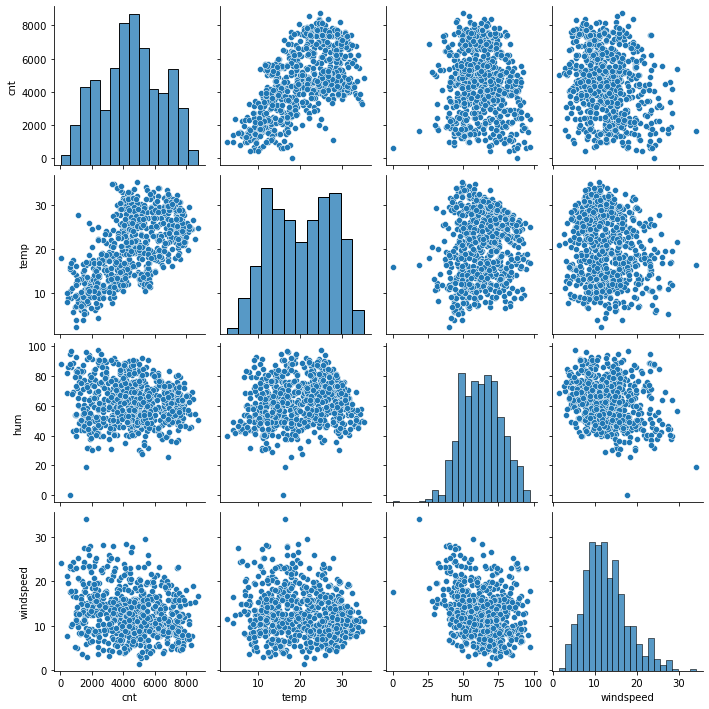

In [30]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bikedata,vars=['cnt', 'temp','hum','windspeed'])
plt.show()

In [31]:
#plt.figure(figsize=(20,15))
#sns.pairplot(bikedata)
#plt.show()

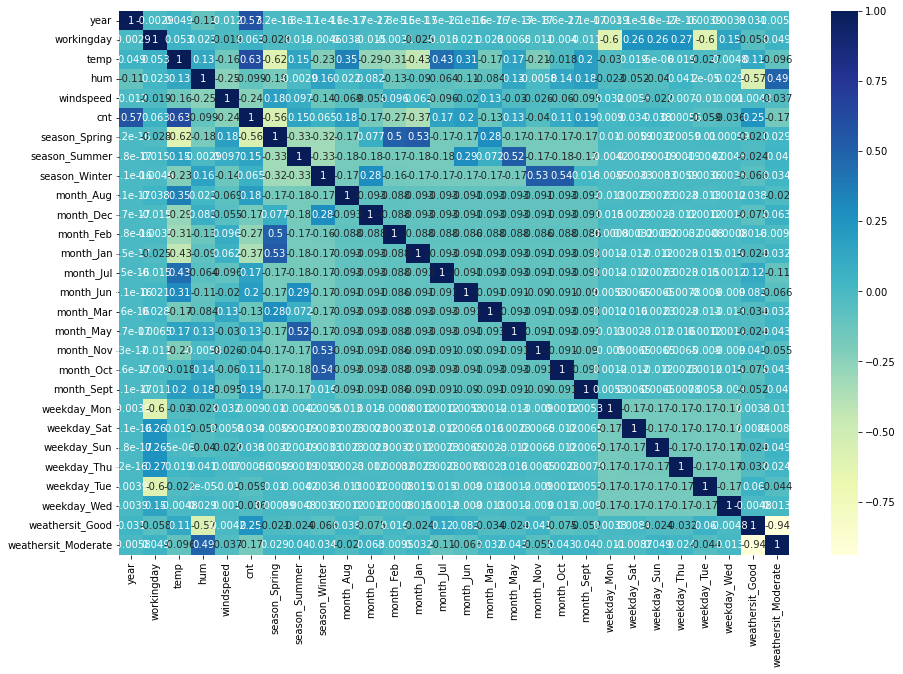

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(bikedata.corr(),cmap="YlGnBu",annot=True)
plt.show()

### Splitting into train and test

In [33]:
bikedata.columns

Index(['year', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'month_Aug',
       'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun',
       'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sept',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Good', 'weathersit_Moderate'],
      dtype='object')

In [34]:
# creating train and test
df_train,df_test = train_test_split(bikedata,train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 28)
(220, 28)


### Rescaling the Features
Here we have more than one variables. it's extremely import to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the cofficients as obtained by fitting the regression model might be very large or very small as compared to the other coffients. This might become very annoying at the time of model evaluation. So it's advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

- Min-Max scaling ( normalisation) => convert data into between 0 and 1
- Standardization(mean-0,sigma-1)

Here, we will use MinMax scaling.

In [35]:
# X is vector
#normalisation  ==> (x- xmin)/(xmax-xmin)
#standardization ==> (x- mean)/sigma

In [36]:
bikedata.head()

,year,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,month_Aug,...,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Good,weathersit_Moderate
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [37]:
# 1. Instantiate MinMaxScaler object
scaler = MinMaxScaler()
num_vars = ['temp', 'hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train[num_vars].head()

,temp,hum,windspeed,cnt
576,0.815169,0.725633,0.264686,0.827658
426,0.442393,0.640189,0.255342,0.465255
728,0.245101,0.498067,0.663106,0.204096
482,0.395666,0.504508,0.188475,0.482973
111,0.345824,0.751824,0.380981,0.191095


In [38]:
df_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


In [39]:
df_train.describe()

,year,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,month_Aug,...,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Good,weathersit_Moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,...,0.084314,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.625490,0.345098
std,0.500429,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,...,0.278131,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


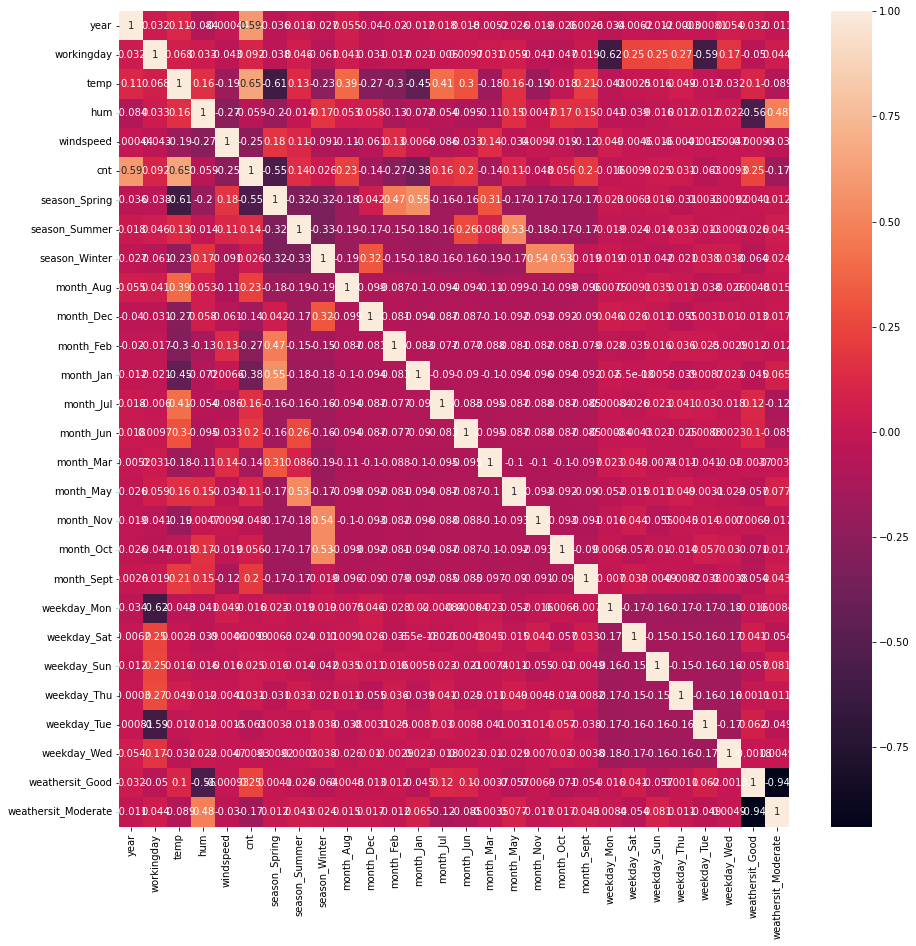

In [40]:
plt.figure(figsize = (15, 15))  #Checking if the variables are highly correlated
sns.heatmap(df_train.corr(), annot = True)
plt.show()

### Build model using RFE

### Dividing into X and Y sets for the model building

In [41]:
y_train = df_train.pop("cnt")
X_train = df_train
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
# Cut down number of features to 10 using automated approach
rfe = RFE(lr,step=10)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), step=10)

In [43]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 2),
 ('season_Winter', True, 1),
 ('month_Aug', False, 3),
 ('month_Dec', False, 2),
 ('month_Feb', False, 3),
 ('month_Jan', False, 2),
 ('month_Jul', True, 1),
 ('month_Jun', False, 3),
 ('month_Mar', False, 3),
 ('month_May', False, 3),
 ('month_Nov', False, 2),
 ('month_Oct', False, 3),
 ('month_Sept', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 3),
 ('weekday_Sun', False, 3),
 ('weekday_Thu', False, 3),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', False, 3),
 ('weathersit_Good', True, 1),
 ('weathersit_Moderate', True, 1)]

In [44]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'workingday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'month_Jul', 'month_Sept', 'weekday_Mon',
       'weekday_Tue', 'weathersit_Good', 'weathersit_Moderate'],
      dtype='object')

In [45]:
X_train.columns[~rfe.support_]

Index(['season_Summer', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan',
       'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Wed'],
      dtype='object')

## Building model using statsmodel for the detailed statistics

In [46]:
# Generic function to calculate VIF of variables
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [47]:
# Generic function to create a model with help of stats api
def buildModelWithStats(df):
    #import statsmodels.api as sm  
    X_train_lm = sm.add_constant(df)
    lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
    #Let's see the summary of our linear model
    print(lm.summary())
    return lm

In [48]:
# Creating x_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [49]:
calculateVIF(X_train_rfe)

,Features,VIF
3,hum,25.82
1,workingday,20.91
2,temp,18.99
11,weathersit_Good,15.21
12,weathersit_Moderate,9.23
9,weekday_Mon,5.48
10,weekday_Tue,5.35
4,windspeed,4.50
5,season_Spring,3.08
6,season_Winter,2.23


In [50]:
# build a model with all variables
buildModelWithStats(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          9.38e-190
Time:                        23:19:50   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0144    

### Removing the `hum` variable is insignificant in presence of other variables; can be dropped

In [51]:
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

In [52]:
calculateVIF(X_train_new)

,Features,VIF
1,workingday,17.27
10,weathersit_Good,15.21
2,temp,14.88
11,weathersit_Moderate,8.71
8,weekday_Mon,4.71
9,weekday_Tue,4.51
3,windspeed,4.48
4,season_Spring,2.79
0,year,2.07
5,season_Winter,1.85


Rebuilding the model without month_November

In [53]:
# building model with Stats model
buildModelWithStats(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.26e-187
Time:                        23:19:50   Log-Likelihood:                 503.06
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     497   BIC:                            -925.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1354    

Removing the `workingday` variable is insignificant in presence of other variables due to high VIF value; can be dropped

In [54]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [55]:
calculateVIF(X_train_new)

,Features,VIF
1,temp,12.25
9,weathersit_Good,11.51
10,weathersit_Moderate,6.38
2,windspeed,4.25
3,season_Spring,2.56
0,year,2.07
4,season_Winter,1.70
5,month_Jul,1.38
7,weekday_Mon,1.22
8,weekday_Tue,1.21


Rebuilding the model without `month_January`

In [56]:
#building mode with stats model
buildModelWithStats(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.6
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.84e-185
Time:                        23:19:50   Log-Likelihood:                 495.11
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     498   BIC:                            -915.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0303    

Removing the `weekday_Mon` variable is insignificant due to high `p-value`; can be dropped

In [57]:
X_train_new = X_train_new.drop(["weekday_Mon"], axis = 1)

In [58]:
calculateVIF(X_train_new)

,Features,VIF
1,temp,12.24
8,weathersit_Good,11.47
9,weathersit_Moderate,6.35
2,windspeed,4.23
3,season_Spring,2.56
0,year,2.07
4,season_Winter,1.70
5,month_Jul,1.38
6,month_Sept,1.20
7,weekday_Tue,1.18


In [59]:
# building model with stats model  
buildModelWithStats(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          2.75e-186
Time:                        23:19:51   Log-Likelihood:                 494.20
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0273    

Removing the `weathersit_Good` variable is insignificant due to high `VIF` compare with other variables; can be dropped

In [60]:
X_train_new = X_train_new.drop(["weathersit_Good"], axis = 1)

In [61]:
calculateVIF(X_train_new)

,Features,VIF
1,temp,4.67
2,windspeed,3.94
0,year,2.05
3,season_Spring,1.64
8,weathersit_Moderate,1.49
4,season_Winter,1.37
5,month_Jul,1.35
6,month_Sept,1.19
7,weekday_Tue,1.17


In [62]:
# building model with stats model  
buildModelWithStats(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     206.7
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          3.15e-162
Time:                        23:19:51   Log-Likelihood:                 434.60
No. Observations:                 510   AIC:                            -849.2
Df Residuals:                     500   BIC:                            -806.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2488    

Removing the `season_Winter` variable is insignificant due to high `p-value` compare with other variables; can be dropped

In [63]:
X_train_new = X_train_new.drop(["season_Winter"], axis = 1)

In [64]:
calculateVIF(X_train_new)

,Features,VIF
1,temp,4.67
2,windspeed,3.73
0,year,2.03
3,season_Spring,1.52
7,weathersit_Moderate,1.47
4,month_Jul,1.33
5,month_Sept,1.19
6,weekday_Tue,1.15


In [65]:
# building model with stats model  
buildModelWithStats(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     229.9
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          2.60e-162
Time:                        23:19:51   Log-Likelihood:                 431.98
No. Observations:                 510   AIC:                            -846.0
Df Residuals:                     501   BIC:                            -807.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2871    

Removing the `month_Sept` variable is insignificant due to high `p-value` compare with other variables; can be dropped

In [66]:
X_train_new = X_train_new.drop(["month_Sept"], axis = 1)

In [67]:
calculateVIF(X_train_new)

,Features,VIF
1,temp,4.25
2,windspeed,3.68
0,year,2.03
3,season_Spring,1.51
6,weathersit_Moderate,1.47
4,month_Jul,1.28
5,weekday_Tue,1.15


In [68]:
# building model with stats model  
buildModelWithStats(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     259.7
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          2.33e-162
Time:                        23:19:51   Log-Likelihood:                 429.22
No. Observations:                 510   AIC:                            -842.4
Df Residuals:                     502   BIC:                            -808.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2860    

Removing the `weekday_Tue` variable is insignificant due to high `p-value` compare with other variables; can be dropped

In [69]:
X_train_new = X_train_new.drop(["weekday_Tue"], axis = 1)

In [70]:
calculateVIF(X_train_new)

,Features,VIF
1,temp,4.19
2,windspeed,3.67
0,year,2.03
3,season_Spring,1.51
5,weathersit_Moderate,1.47
4,month_Jul,1.28


In [71]:
# building model with stats model  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     297.6
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          6.56e-162
Time:                        23:19:51   Log-Likelihood:                 425.22
No. Observations:                 510   AIC:                            -836.4
Df Residuals:                     503   BIC:                            -806.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2784    

In [72]:
X_train_new.columns

Index(['year', 'temp', 'windspeed', 'season_Spring', 'month_Jul',
       'weathersit_Moderate'],
      dtype='object')

## Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [73]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

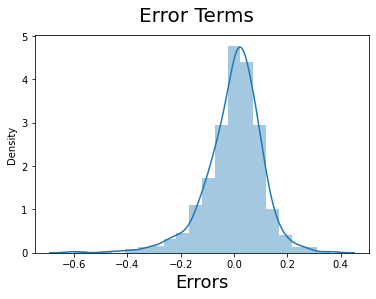

In [74]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions
Applying the scaling on the test sets

In [75]:
num_vars = ['temp', 'hum','windspeed','cnt'] 
df_test[num_vars] = scaler.transform(df_test[num_vars])

Dividing into X_test and y_test

In [76]:
y_test = df_test.pop('cnt')
X_test = df_test

In [77]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [78]:
# Making predictions
y_pred = lm.predict(X_test_new)

### R-Squared value for train predictions

In [79]:
#Print R-squared Value
r2_score(y_train,y_train_cnt)

0.7801873103743808

### Prediction of values on test dataset

In [80]:
#Print R-squared Value
r2_score(y_test,y_pred)

0.7722148714221881

## Model Evaluation

Text(0, 0.5, 'y_pred')

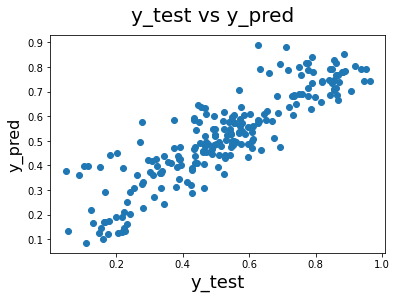

In [81]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [82]:
round(lm.params,4)

const                  0.2784
year                   0.2400
temp                   0.4335
windspeed             -0.1822
season_Spring         -0.1333
month_Jul             -0.0853
weathersit_Moderate   -0.0648
dtype: float64

We can see that the equation of our best fitted line is:
    
cnt = 0.2784 + 0.2400 x year + 0.4335 x temp - 0.1822 x windspeed - 0.1333 x season_Spring - 0.0853 x month_Jul - 0.0648 x weathersit_Moderate


Demand of bikes depend on year, temp, windspeed, season spring,July month, weathersit moderate

Conclusion:
    Year, Temp and windspeed more dominating features for contributing significatly towards the Bike share